In [15]:
import adddeps
from utils.logs import get_stdout_logger
from simulator.magnetic import SimulatorMagnetic
from matplotlib import pyplot as plt
import numpy as np
import numbers

params_model = {
    "group_name" : "BEnsemble 2",
    "abc":np.array([10**0.5]*3),
    "sigma":2.9,
    "epsilon":1.0,
    "get_logger" : get_stdout_logger
}
params_init = {
    "energy": 1.0,
    "sigma_grid":3,
    "position_random_shift_percentage": 0.0/100,
    "angular_momentum_factor":0.6,
    "planar": False,
    "zero_momentum": False,
}
params_simulation = {
    "iteration_time" : 1000,
    "dt" : 1e-3,
    "record_interval" : 1e-1,
    "algorithm" : "VERLET",
    # "before_step" : before_step
}

sim = SimulatorMagnetic(Bz=1e-3, **params_model)
sim.init_positions_closepack(**params_init)
sim.init_velocities(**params_init)

sim.particle_number()

19

In [16]:
sim.simulate_estimate(**params_simulation)

{'time': datetime.timedelta(seconds=605), 'memory': 12.683868408203125}

In [17]:
sim.simulate(**params_simulation);

2023-02-21 19:06:47,837 - base - INFO - starting simulation None BEnsemble 2 [Process: 11057, base.py:simulate(427)]


100%|██████████| 1000000/1000000 [01:46<00:00, 9417.98it/s]


In [18]:
dfs = sim.get_data_frames()

In [19]:
dfs.keys()

dict_keys(['index', 'KE', 'PE', 'L', 'IE', 'collisions', 'BInertia'])

2023-02-21 19:08:34,173 - legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument. [Process: 11057, legend.py:_parse_legend_args(1218)]


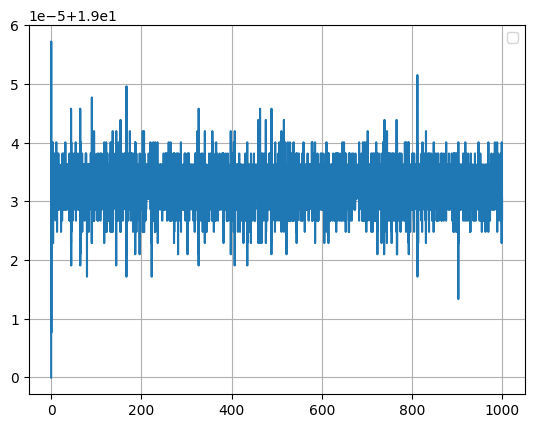

In [20]:
plt.plot((dfs["KE"] + dfs["PE"] + 0.5* dfs["IE"]).sum(axis=1))
plt.grid()
plt.legend()

2023-02-21 19:08:34,313 - legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument. [Process: 11057, legend.py:_parse_legend_args(1218)]


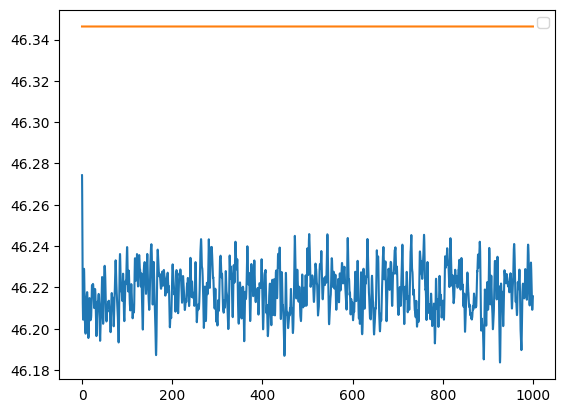

In [21]:
plt.plot(( dfs["L"]).sum(axis=1))
plt.plot((dfs["BInertia"] + dfs["L"]).sum(axis=1))
plt.legend()

In [22]:
sim.get_history().keys()

dict_keys(['time', 'rs', 'vs', 'KE', 'PE', 'IE', 'L', 'OMEGA', 'collisions', 'BInertia'])

In [23]:
(sim.get_history()["vs"]**2)[5000:].mean(axis=0).mean(axis=1)

array([0.47225928, 0.4536206 , 0.2756195 ], dtype=float32)

In [24]:
sim.get_history()["vs"].shape

(10001, 3, 19)

In [25]:
dfs["KE"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0.0,1.618160,0.515387,0.086399,1.307666,0.845264,3.229457,1.122374,0.922658,0.385635,1.023918,1.218627,0.817853,1.367141,0.215126,1.755420,0.589068,1.496931,0.919317,1.216685
0.1,1.799744,0.425192,0.167725,1.243297,0.715657,2.843828,0.940543,0.988995,0.517975,0.772089,0.889483,0.471701,1.135462,0.313974,1.563396,0.558891,1.213348,0.774106,1.058162
0.2,1.829195,0.525157,0.659083,1.131403,0.754122,2.185272,0.672965,1.014704,0.545922,0.295522,0.479466,0.111025,1.022897,0.326266,1.140245,0.550367,0.746331,0.671302,0.904929
0.3,1.764150,0.833370,1.634289,1.046092,1.136942,1.897124,0.540484,1.148951,0.533823,0.117970,0.910285,0.190612,1.223709,0.289828,1.018807,0.578899,0.667513,0.906195,1.049498
0.4,1.650287,1.115930,2.326287,0.990441,1.433090,1.928201,0.582741,1.290311,0.502927,0.191499,1.524484,0.471469,1.419109,0.238508,1.153030,0.625334,0.872227,1.157947,1.294779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999.6,0.366751,0.061607,0.751581,0.332683,0.719543,0.727413,0.485175,0.078014,1.159382,0.602745,0.330310,0.340221,0.467716,1.161031,0.760936,0.618457,0.890089,0.320616,0.648385
999.7,0.446868,0.101774,0.286836,0.374612,0.779853,0.702376,0.446278,0.064766,0.585539,0.662405,0.258958,0.283182,0.405484,1.172326,0.770977,0.593274,0.906763,0.350891,0.654910
999.8,0.516756,0.141436,0.333525,0.467245,0.849889,0.611456,0.412207,0.065013,0.421206,0.715952,0.188479,0.238495,0.356394,1.189376,0.718305,0.533602,0.928196,0.408499,0.662062
999.9,0.558031,0.183172,0.805860,0.635943,0.929167,0.512446,0.383738,0.060802,0.813551,0.725106,0.127016,0.205656,0.324842,1.210874,0.632120,0.527366,0.953850,0.526645,0.660770
